## Task-2  Prediction using Unsupervised ML
### Author: Stephine Eliza Varghese
<strong>Objective</strong>: To predict the optimum number of clusters in the 'iris' data and representing it visually.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\data science\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Dropping the Id column
data=data.drop('Id',axis=1)
x=data.copy()

### Visualising the Relationship

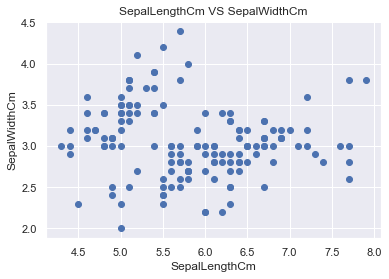

In [4]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('SepalLengthCm VS SepalWidthCm')
plt.show()

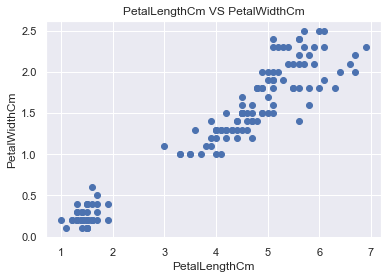

In [5]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('PetalLengthCm VS PetalWidthCm')
plt.show()

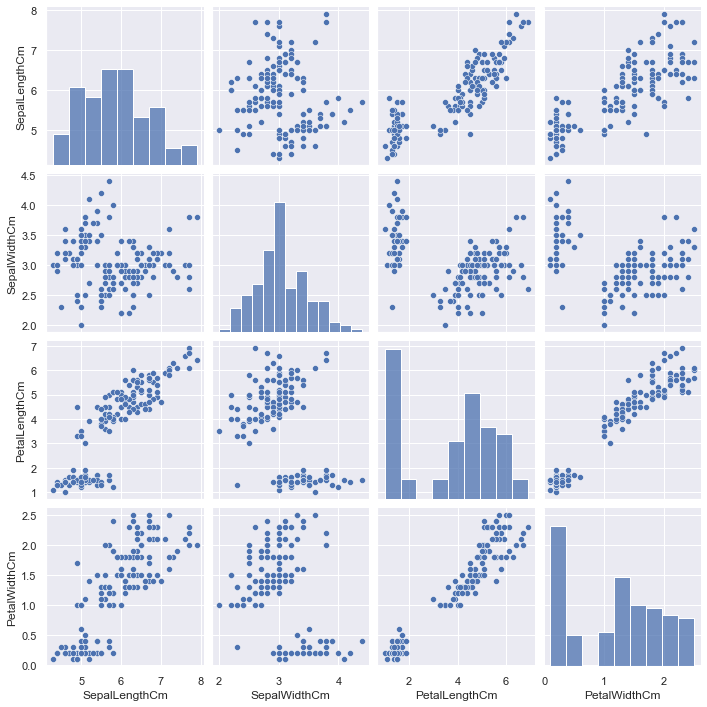

In [6]:
#to visualize the relationships between pairs of variables
sns.pairplot(data)

## Clustering

In [7]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
#Find WCSS for 9 iterations
# To use WCSS values obtained for the "Elbow Method" to determine the optimal number of clusters.
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.930963049671746,
 34.190687924796634,
 30.063874432733137,
 27.84235606060608]

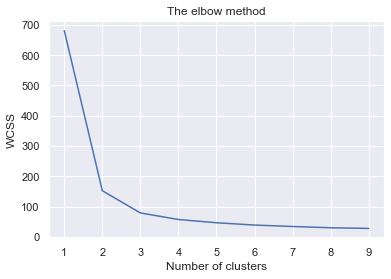

In [8]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
     

Clusters can be 2 or 3 for the given data set.

In [9]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

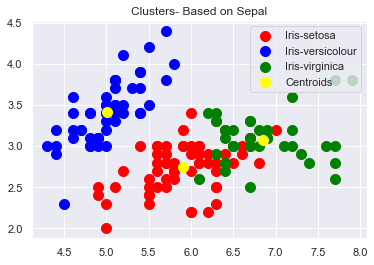

In [10]:
# Visualising the clusters- Based on sepal
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow',label = 'Centroids')
plt.legend()
plt.title("Clusters- Based on Sepal")
plt.show()

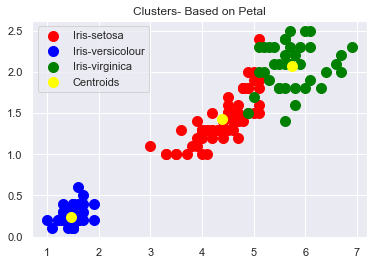

In [11]:
# Visualising the clusters- Based on Petal
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s=100, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],
            s = 100, c = 'yellow',label = 'Centroids')
plt.legend()
plt.title("Clusters- Based on Petal")
plt.show()

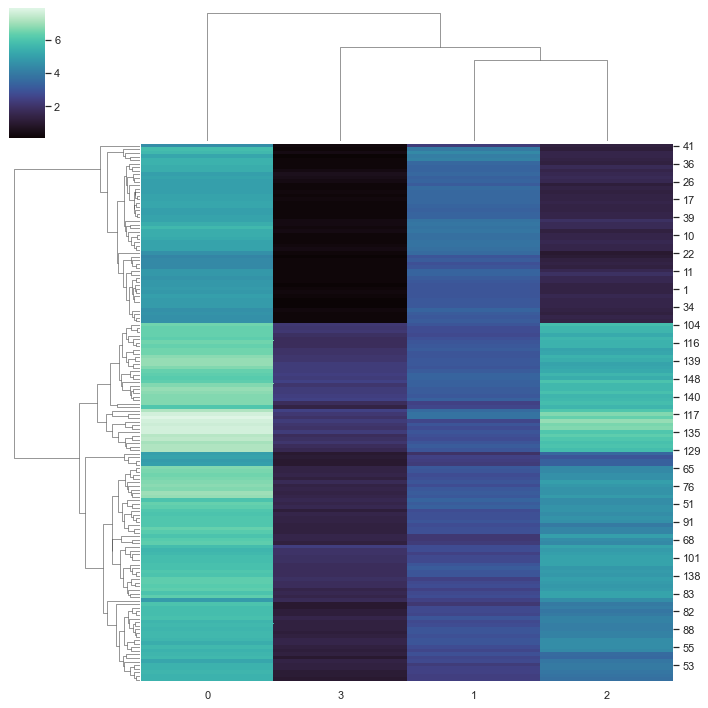

In [12]:
#Visualising the clusters using the heatmap
sns.clustermap(x, cmap='mako')

From the heatmap 3 clusters are visible.